___
# HW # 5



____

## Problem #1 (10)

In this problem you are going to explore making a parallel plot using Pandas. In general, the plotting in Pandas is not the best; but, sometimes you just want to do quick EDA only with Pandas without dealing with other libraries. 

🤓 Follow these steps:
* pick a dataset and put it into a dataframe,
* make a parallel plot using Pandas's `parallel_coordinates`,
* make at least two versions by choosing how you color the lines, (e.g., coloring by a categorical variable),
* think about what conclusions you would draw about your dataset from these explorations,
* scale the data using a z-score, and remake the parallel plot,
* does the scaling aid in the visualization process? if so, how? if not, why not? (the answer will depend on the dataset you choose!)

If you want some helper code, uncomment the code below. If you use it, comment every line and enusre that it is PEP-8 compliant.

In [ ]:
# import seaborn as sns
# import pandas as pd
# from scipy.stats import zscore
# import numpy as np
# import matplotlib.pyplot as plt

# f, (a1,a2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))

# df_p = sns.load_dataset("penguins").dropna()

# pd.plotting.parallel_coordinates(df_p[["species", "bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g"]], "species",ax=a1)

# pd.plotting.parallel_coordinates(df_p[["sex", "bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g"]], "sex",ax=a1)

# numeric_cols = df_p.select_dtypes(include=[np.number]).columns

# df_p_s = df_p[numeric_cols].apply(zscore)

# df_p_s["species"] = df_p["species"]
# pd.plotting.parallel_coordinates(df_p_s, "species",ax=a2)

# df_p_s["sex"] = df_p["sex"]
# pd.plotting.parallel_coordinates(df_p_s, "sex",ax=a2)

In [4]:
# Importing required libraries and dataset
import seaborn as sns
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

df_t = sns.load_dataset("titanic").dropna()
df_t.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


<AxesSubplot:>

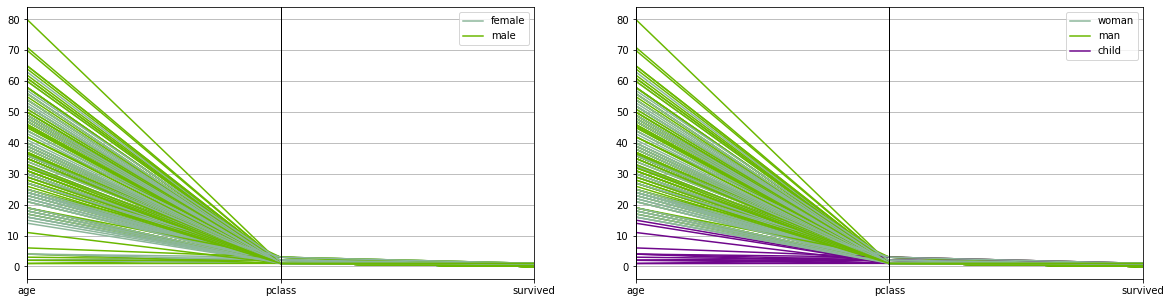

In [9]:
# Plotting the figures with multiple categorical variables as color

# Difining figure and two subplots and simultaneously assigning them into variable f, a1 and a2 respectively
f, (a1, a2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5)) 

# Using parallel_coordinates function we input required attributes by fitering the dataframe and assigning figure to a1
pd.plotting.parallel_coordinates(df_t[["sex", "age",
    "pclass", "survived"]], "sex", ax=a1)

# Using who as color to analyse and assigning the figure to a2
pd.plotting.parallel_coordinates(df_t[["who", "age",
    "pclass", "survived"]], "who", ax=a2)


## Insights if any?
* It is hard to draw any conclusions as visualising is difficult due to extreme clutterness of data points, expecially when we include categorical variables in the data  

<AxesSubplot:>

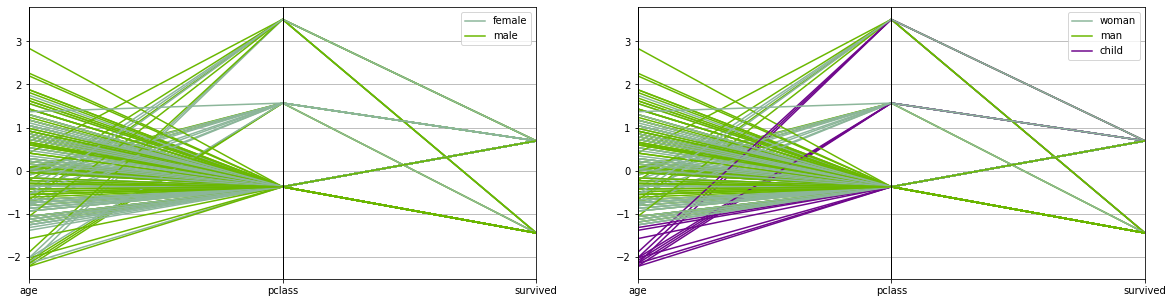

In [10]:
# Using Zscore to normalise and then analysing the difference

f, (a1, a2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))

# Selecting all the numeric columns for applying zscore
numeric_cols = df_t.select_dtypes(include=[np.number]).columns 

df_t_s = df_t[numeric_cols].apply(zscore)
df_t_s["sex"] = df_t["sex"] # Adding column sex for coloring

df_t_w = df_t[numeric_cols].apply(zscore)
df_t_w["who"] = df_t["who"] # Adding column who for coloring

# Using parallel_coordinates function we input required attributes by fitering the dataframe and assigning figure to a1
pd.plotting.parallel_coordinates(df_t_s[["sex", "age",
    "pclass", "survived"]], "sex", ax=a1)

# Using who as color to analyse and assigning the figure to a2
pd.plotting.parallel_coordinates(df_t_w[["who", "age",
    "pclass", "survived"]], "who", ax=a2)


## Is Scaling helpful? 
* Scaling and normalising numeric attributes in the dataset was a tremendous help, as its clearer to visualise and understand the patterns hidden in the dataset
* As seen above we can gather insights like:
    * The ones who survived mostly consisted of women and childrens and some upper high class men
    * The ones who died mostly consist of lower class men
* So without scaling it was impossible to understand such behaviour of data

____

## Problem #2 (10)

Next, we are going to compare that with HiPlot. 

🤓 Follow these steps:
* install HiPlot on your machine,
* read the documentation to understand how to use HiPlot with a dataframe,
* open HiPlot in your notebook with the dataset you explored in the previous problem,
* play with HiPlot so that you know how to use its most important features:
  * how do you select a portion of one of the vertical axes?
  * how do you slide the range box vertically to select different portions of the data? 
  * can you select (with the gray boxes) different ranges on different vertical axes? 
  * how do you reorder the vertical axes? 
  * what use the dataframe below the plot? what happens if you mouse over the rows? 
  * for your dataset, set the order of the vertical axes to correspond to a narrative/story, and describe that in a markdown cell - image you are using such a plot for your project and you want to tell a specific story. 

If you find HiPlot useful, consider using it in your project. [It works with streamlit.](https://facebookresearch.github.io/hiplot/tuto_streamlit.html) 

In [3]:
#!pip install -U -qqq hiplot # needed for Google colab
import hiplot as hip
print(f"HiPlot=={hip.__version__}")

HiPlot==0.1.33


In [12]:
# Using titanic dataset to plot Hiplot
hip.Experiment.from_dataframe(df_t[["sex", "age",
    "pclass", "survived"]]).display()

<IPython.core.display.Javascript object>

In [13]:
# Using titanic dataset to plot Hiplot
hip.Experiment.from_dataframe(df_t[["sex", "age",
    "pclass", "survived"]]).display()

<IPython.core.display.Javascript object>

## Tips
* To select portion of one of the vertical axis, click and hold the pointer on the axis and scroll to the point of selection
* To slide the range click and hold the selected range and scroll the pointer to slide the range
* One can select multiple gray range boxes, i.e one for each attribute with different range. This provides more flexibility in visualizing
* To reorder the vertical axis select and hold the attribute at top of the chart and drag horizontally to reorder
* The dataframe provides more details on attributes and by howering mouse over a row we highlight particular data point on our Hiplot
* As Clearly visible from the chart, females especially from the upper class had a very high survival rate 

____

## Problem #3 (30)

It is time to start working on your project! 

Hopefully the HWs have prepared you to get started. Here is the schedule:
* just a reminder: I am out of town the week of Oct. 17, but you'll have a guest instructor on probabilty and statistics; the week will be mostly normal,
* the next week is Fall Break - we don't meet on Monday of that week,
* your projects are due at the end of that week: in D2L by midnight on Friday, October 27th,
* during the week of Oct. 24, you will present your projects to the other members of your class; the procedure will be:
  * the order of presentations will be random, so you might be presenting Wed or Fri (be ready in case you are Wed! no excuses! 😉),
  * during the presentations, you will listen to some of the presentations and interact (e.g., ask questions) with the person speaking,
  * you will complete a report of the speakers that you listened to and turn that in (to D2L as a pdf file).

You have just over two weeks! But, try to get ahead so that you can enjoy Fall Break! You deserve a rest!

Here are the requirements for your project. Note that these requirements may not apply to each student perfectly, because you all have some flexibility in how you design your project. If there are any special issues with your project (e.g., the data is proprietary), please let me know so that we can work with your situation. 
* your project will be a streamlit app with two levels of interactivity:
  * in streamlit (e.g., through sliders, dropdowns, etc.),
  * in the visualizations themselves (e.g., using Altair or HiPlot),
  * you must have a goal, a message, a story -- there should be a point to what you are doing,
  * the app should contain any necessary text that aids the user to understand and explore your story,
  * the app should be deployed to Heroku from your code at Github, and your link should be sent to Vicente by Wed before class. 

  A good example [is here](https://caron14-streamlit-linearregression-boston-house-prices-m9mvyd.streamlitapp.com) - try to be at least this complete in your app. 

  As always, please contact us, or use Slack, with any issues that arise! 

  🤓 For this HW, you are going to write an essay that is 500 to 1000 words. Use the [best markdown practices](https://www.markdownguide.org/cheat-sheet/), and put everything in a cell below. (You can use one plot, but no more.) What you will write is a proposal for your project. Include this in your proposal:
  1. What is the goal, what is the point? What is the "big-picture" question you are trying to answer? Who cares? Why do they care? 
  2. Discuss which datasets you have looked at toward this goal. Which ones did you reject and why? Which dataset did you finally choose? 
  3. Describe the dataset. What is in it? Where did it come from? Are there issues, such as missingness? If so, what type (e.g., MNAR)?
  4. What preliminary studies have you done? Do they look promising?
  5. What will your web app do? How will this be useful to people? 
  6. What visualization tools do you plan on using? Why did you choose these? How will they serve the goal you outlined in step 1?
  7. Summarize with why you think this is a project worthy of completing.

  In your writing, use the best rules of English grammar, punctuation and formatting. Be sure you edit the proposal a few times before submitting it. It should be very clear, easy to read and convincing. 
  



----
### <center> Analysis of Endangered Species Over Time

✏️The food chain is a highly connected network of species, thus when irrevocable damages are done to any one of the species, their ripple effects can be observed in others. We all humans should care and take responsibility before things come to a point of no return. The goal of the project is to understand how the number of endangered species of animals and plants across the globe is changing over time. Furthermore, to find insights that might be helpful in planning strategies to increase the population of these species and identify countries where the situation is worsening. 

The internet was full of interesting datasets, while some contained attributes on a global scale like the total number of endangered plants over the years, others contained more precise data like attributes related to a single country or a single type of specie (for e.g. - data only about fishes or animals). There were datasets containing data points on country-level granularity which I intended to use but the source of origin was not much trustworthy. Finally, I stumbled upon a dataset organized and maintained by the [United Nations](https://data.un.org/), available for public research. The dataset contains attributes like `country, country code, year, # of endangered vertebrates, # of endangered invertebrates, # of endangered plants, total endangered species`, etc. The dataset is very clean and contains very few missing data points. The missingness is **completely random** and no relation could be determined.

The exploratory analysis of the dataset provided a clear picture of the distribution. The statistical parameters like standard deviation and correlations showed positive signs. Although, the dataset contained many outliers, but on further analysis for almost every attribute, the top five countries corresponded to *20-30* % of the total number of endangered species. Thus, it indicates that concentrating only on these top countries could potentially help us solve approximately 1/5th of our problems.

The web application will work as an interactive report, with various filters to deep down into the dataset and alter charts accordingly. The application will consist of features that enable users to understand raw data, perform bivariate analysis and visualize key insights like top effected countries through interactive plots. The charts that will be embedded in the application will be plotted with the help of Altair. Altair provides more flexibility and allows us to model details of the chart as per our needs.

I plan to use multi-line plots and world maps aligned with filters to convey my findings to the user and provide them with an option to explore.
The multi-line chart will showcase the overall trend over time, while world maps will help me visualize top-impacted countries around the world. 

I believe the project is worth enough to complete because of the following reasons:
* This can be one of the ways to give back to nature and frankly speaking this reason is all I think is worthy enough to complete the project
* I would love to work in the field of wildlife, and if this project sparks my interest to explore more and I would love to give it a try!   
* Everything I will be working on in terms of technology used, tools used, and methodologies applied are new to me, and learning them will be extremely beneficial
* I have prior technical experience in languages, but I truly lack in conveying insights, the application would be a perfect place for me to explore all the ideas I can think off and test as much as I can in the learning phase
* I can add that on my GitHub and Heroku profiles 😃


<center> Thank You!